In [34]:
import pandas as pd
from pandas import DataFrame
from pandas import datetime
from pandas.plotting import autocorrelation_plot
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

import warnings;
warnings.filterwarnings('ignore')

In [35]:
# Loading online retail data
file_path = "C://Users//lenovo//Desktop//7LYTIX//online_retail_II.csv"
df = pd.read_csv(file_path, encoding= 'ISO-8859-1')
# Preview the original data
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [36]:
# Check for missing values
df.isnull().sum()

Invoice             0
StockCode           0
Description      4372
Quantity            0
InvoiceDate         0
Price               0
Customer ID    236682
Country             0
dtype: int64

In [37]:
# Remove missing values
df.dropna(inplace=True)

In [38]:
# Create sales dataFrame, where total price = quantity*price
sales = pd.DataFrame({'InvoiceDate': pd.to_datetime(df['InvoiceDate']).dt.date.astype(str),
                             'TotalPrice': (df['Quantity'] * df['Price']).astype(float)})
sales_list = sales.values.tolist()

In [39]:
# Aggregating sales data by week
# This function return the week of the invoice date 
def toWeek(sale):
    sunday = datetime.strptime(sale[0], '%Y-%m-%d').strftime('%Y-%U-0')
    return datetime.strptime(sunday, '%Y-%U-%w').strftime('%Y-%m-%d')

grouped_sales = itertools.groupby(sales_list, toWeek)

# Final sales aggregation
aggregate_sales = (
    (week, sum(day_sales for date, day_sales in week_sales))
    for week, week_sales in grouped_sales)

# Create dataframe from the aggregated sales
aggregate_sales_df = DataFrame(list(aggregate_sales),columns=['Week','TotalSales']) 

In [40]:
# Preview the aggregate_sales_df
aggregate_sales_df.head()

,Week,TotalSales
0,2009-11-29,200310.54
1,2009-12-06,202519.82
2,2009-12-13,215782.54
3,2009-12-20,44659.15
4,2010-01-03,142749.99


In [41]:
# Set the aggregate_sales_df index using Week column
aggregate_sales_df.set_index('Week', inplace=True)

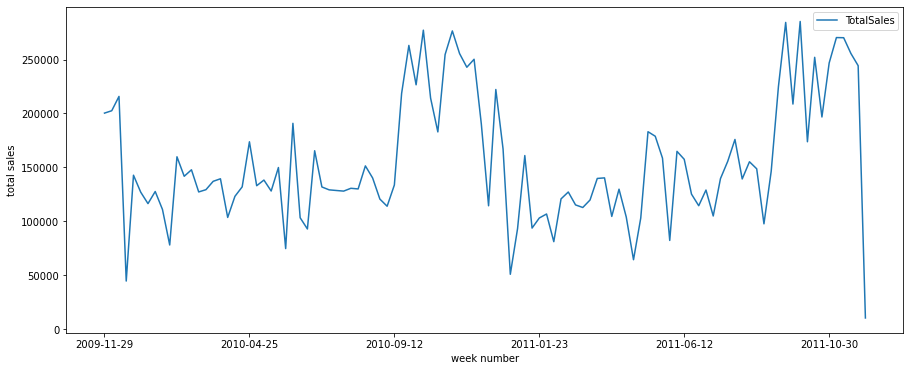

In [42]:
# Plotting aggregate_sales_df data
# It is noteworthy that time aggregated sales series is with trends. Therefore, the series is non-stationary.
aggregate_sales_df.plot(figsize=(15,6))
plt.xlabel("week number")
plt.ylabel("total sales")
plt.show()

RMSE value: 67461.534


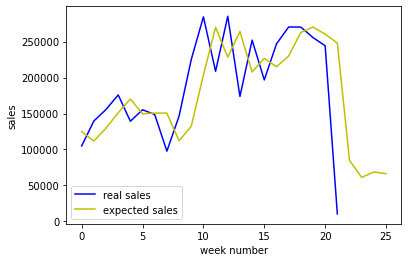

In [43]:
# Building ARIMA model and evaluate it using a walk-forward validation

# Split into train and test sets
data_set = aggregate_sales_df.values
size = int(len(data_set) * 0.80)
sales_train, sales_test = data_set[0:size], data_set[size:len(data_set)]
next_4_Weeks = list(range(len(data_set), len(data_set)+4))
history = [x for x in sales_train]
prediction_result = list()

# Define ARIMA paramentes
p,d,q = 1,1,0

# Applying walk-forward validation    
for t in range(len(sales_test)):
    model = ARIMA(history, order=(p,d,q))
    model_fit = model.fit()
    result = model_fit.forecast()
    res = result[0]
    prediction_result.append(res)
    real_value = sales_test[t]
    history.append(real_value)
    
# evaluate forecasts
rmse = sqrt(mean_squared_error(sales_test, prediction_results))
print('RMSE value: %.3f' % rmse)

# Predict the sales for the next four weeks
for t in range(len(next_4_Weeks)):
    model = ARIMA(history, order=(p,d,q))
    model_fit = model.fit()
    result = model_fit.forecast()
    res = result[0]
    prediction_result.append(res)
    history.append([res])
      
# Plot forecasts with real sales data (with the next 4 weeks)
pyplot.plot(sales_test, color='b')
pyplot.plot(prediction_result, color='y')
plt.legend(['real sales','expected sales'], loc='lower left')
plt.xlabel("week number")
plt.ylabel("sales")
pyplot.show()